*Credits: materials from this notebook belong to YSDA [Practical DL](https://github.com/yandexdataschool/Practical_DL) course. Special thanks for making them available online.*

# Lab assignment №1, part 1

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

## 1. Matrix differentiation

Since it easy to google every task please please please try to undestand what's going on. The "just answer" thing will be not counted, make sure to present derivation of your solution. It is absolutely OK if you found an answer on web then just exercise in $\LaTeX$ copying it into here.

Useful links: 
[1](http://www.machinelearning.ru/wiki/images/2/2a/Matrix-Gauss.pdf)
[2](http://www.atmos.washington.edu/~dennis/MatrixCalculus.pdf)

## ex. 1

$$  
y = x^Tx,  \quad x \in \mathbb{R}^N 
$$

$$
\frac{dy}{dx} = 
$$ 

$$\quad x = (x_{1}, x_{2}, ..., x_{N-1}, x_{N}) \\
y = x^Tx
y = x_{1}^2 + x_{2}^2 + ... +x_{N-1}^2 + x_{N}^2 \\
\frac{dy}{dx} = (\frac{\partial y}{\partial x_{1}}, \frac{\partial y}{\partial x_{2}}, ..., \frac{\partial y}{\partial x_{N-1}}\frac{\partial y}{\partial x_{N}}) \\
\frac{dy}{dx} = (2x_{1}, 2x_{2}, ..., 2x_{N}) \\
\frac{dy}{dx} = 2x $$

## ex. 2

$$ y = tr(AB) \quad A,B \in \mathbb{R}^{N \times N} $$ 

$$
\frac{dy}{dA} =
$$

$$trAB = \sum_{i=1}^Na_{1i}b_{i1} + \sum_{i=1}^Na_{2i}b_{i2} + ... + \sum_{i=1}^Na_{Ni}b_{iN} \\
\frac{\partial tr(AB)}{\partial a_{ij}} = bji for all i\\
\frac{dy}{dA} = B^T \\
$$

## ex. 3

$$  
y = x^TAc , \quad A\in \mathbb{R}^{N \times N}, x\in \mathbb{R}^{N}, c\in \mathbb{R}^{N} 
$$

$$
\frac{dy}{dx} =
$$

$$
\frac{dy}{dA} =
$$ 

$$ B = Ac y = x^TB y = \sum_{i=1}^Nx_{i}b_{i} \\
 \frac{dy}{dx} = B = Ac
x^TA = \sum_{i=1}^N x_i a_{i1}...\sum_{i=1}^N x_i a_{iN} \\
y = x^TAc = \sum_{i=1}^N\sum_{j=1}^N x_{j} a_{ji} c_{i} \\
\frac{\partial y}{\partial a_{ij}} = x_{j} c_{i} \\
\frac{dy}{dA} = xc^T \\ $$


Hint for the latter (one of the ways): use *ex. 2* result and the fact 
$$
tr(ABC) = tr (CAB)
$$

## ex. 4

Classic matrix factorization example. Given matrix $X$ you need to find $A$, $S$ to approximate $X$. This can be done by simple gradient descent iteratively alternating $A$ and $S$ updates.
$$
J = || X - AS ||_F^2  , \quad A\in \mathbb{R}^{N \times R} , \quad S\in \mathbb{R}^{R \times M}
$$
$$
\frac{dJ}{dS} = ? 
$$

You may use one of the following approaches:

#### First approach
Using ex.2 and the fact:
$$
|| X ||_F^2 = tr(XX^T) 
$$ 
it is easy to derive gradients (you can find it in one of the refs). 

$$||( X - AS) ||_F^2 = tr((X - AS)(X - AS)^T)
\frac{dJ}{dS} = -2\frac{d(tr(ASX^T))}{dS} + \frac{d(tr(ASS^TA^T))}{dS} \\
\frac{d(tr(ASX^T))}{dS} = A^TX \\
B = AS \\
ASS^TA^T =BB^T \\
B_{ij} = \sum_{k=1}^RA_{ik}S_{kj}
tr(BB^T) = \sum_{i=1}^N\sum_{j=1}^MB_{ij}^2 \\
= \sum_{i=1}^N\sum_{j=1}^M(\sum_{k=1}^RA_{ik}S_{kj})^2 \\
\frac{d(tr(BB^T))}{dS} = 2A^TB \\
\frac{d(tr(BB^T))}{dS} = 2A^TAS \\
\frac{dJ}{dS} = 2A^TAS - 2A^TX \\
\frac{dJ}{dS} = 2(A^TAS - A^TX) \\
$$

#### Second approach
You can use *slightly different techniques* if they suits you. Take a look at this derivation:
<img src="https://github.com/girafe-ai/ml-course/blob/22f_basic/homeworks/lab01_ml_pipeline/grad.png?raw=1">
(excerpt from [Handbook of blind source separation, Jutten, page 517](https://books.google.ru/books?id=PTbj03bYH6kC&printsec=frontcover&dq=Handbook+of+Blind+Source+Separation&hl=en&sa=X&ved=0ahUKEwi-q_apiJDLAhULvXIKHVXJDWcQ6AEIHDAA#v=onepage&q=Handbook%20of%20Blind%20Source%20Separation&f=false), open for better picture).

#### Third approach
And finally we can use chain rule! 
let $ F = AS $ 

**Find**
$$
\frac{dJ}{dF} =  
$$ 
and 
$$
\frac{dF}{dS} =  
$$ 
(the shape should be $ NM \times RM )$.

Now it is easy do get desired gradients:
$$
\frac{dJ}{dS} =  
$$ 

$$J = || X - AS ||_F^2 = || X - F ||_F^2 = tr((X - F)(X - F)^T) = tr((X - F)(X^T-F^T) = tr(XX^T - 2FX^T + FF^T) \\
\frac{dJ}{dF} = -2 \frac{d(tr(FX^T))}{dF} + \frac{d(tr(FF^T))}{dF} = -2X + 2F \\
\frac{dF}{dS} = \frac{d(AS)}{dS} = A^T \\
\frac{dJ}{dS} = = 2(ASA^T - XA^T)\\ $$

## 2. kNN questions
Here come the questions from the assignment0_01. Please, refer to the assignment0_01 to get the context of the questions.

### Question 1

Notice the structured patterns in the distance matrix, where some rows or columns are visible brighter. (Note that with the default color scheme black indicates low distances while white indicates high distances.)

- What in the data is the cause behind the distinctly bright rows?
- What causes the columns?

*Your Answer:*
Given that we are dealing with pixel intensity values, clearly bright rows signify a sizable difference in pixel intensities between the respective test and training photos (say a black background being "compared" to a white background and vice-versa). While variations in the foreground can undoubtedly affect pixel deltas, in some instances the background of a picture can make up a disproportionately large amount of the image, which can significantly affect a pixel-level delta. For the instance of clearly bright rows, we can deduce that the test picture's contents for that row's specific test image have a noticeably different foreground/background that results in a sizeable pixel delta. Similarly, the distinctly bright columns can be due to a particular train image having content that does not match the test images.

The same happens with the columns but instead we now compare a training image with all test images.




### Question 2

We can also use other distance metrics such as L1 distance.
For pixel values $p_{ij}^{(k)}$ at location $(i,j)$ of some image $I_k$, 

the mean $\mu$ across all pixels over all images is $$\mu=\frac{1}{nhw}\sum_{k=1}^n\sum_{i=1}^{h}\sum_{j=1}^{w}p_{ij}^{(k)}$$
And the pixel-wise mean $\mu_{ij}$ across all images is 
$$\mu_{ij}=\frac{1}{n}\sum_{k=1}^np_{ij}^{(k)}.$$
The general standard deviation $\sigma$ and pixel-wise standard deviation $\sigma_{ij}$ is defined similarly.

Which of the following preprocessing steps will not change the performance of a Nearest Neighbor classifier that uses L1 distance? Select all that apply.
1. Subtracting the mean $\mu$ ($\tilde{p}_{ij}^{(k)}=p_{ij}^{(k)}-\mu$.)
2. Subtracting the per pixel mean $\mu_{ij}$  ($\tilde{p}_{ij}^{(k)}=p_{ij}^{(k)}-\mu_{ij}$.)
3. Subtracting the mean $\mu$ and dividing by the standard deviation $\sigma$.
4. Subtracting the pixel-wise mean $\mu_{ij}$ and dividing by the pixel-wise standard deviation $\sigma_{ij}$.
5. Rotating the coordinate axes of the data.

*Your Answer:* 1 & 3.


*Your Explanation:*
The distance L1 is norm of x2, x1. 
1.On the subtraction of mean(μ). 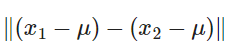
Hence, L1 remains unchanged.
3. On subtraction of the mean and division by standard deviation α.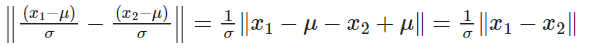 It is only scaled by a common factor. Hence, L1 remains ucnchanged.



## Question 3

Which of the following statements about $k$-Nearest Neighbor ($k$-NN) are true in a classification setting, and for all $k$? Select all that apply.
1. The decision boundary (hyperplane between classes in feature space) of the k-NN classifier is linear.
2. The training error of a 1-NN will always be lower than that of 5-NN.
3. The test error of a 1-NN will always be lower than that of a 5-NN.
4. The time needed to classify a test example with the k-NN classifier grows with the size of the training set.
5. None of the above.

*Your Answer:* 4


*Your Explanation:* Increasing the size of the training dataset results in a huge number of comparisons between a test example and the entire training dataset.


